# Data processing 

# Importing Libraries 

In [1]:
%pip install numpy
%pip install pandas 
%pip install matplotlib
%pip install sklearn
%pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


Loading of data to workspace .

In [2]:
url="https://raw.githubusercontent.com/ADITHYASNAIR2021/Diabetes-Dataset-/main/diabetes.csv"
diabetes_df = pd.read_csv(url)
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Check dimension of the DataFrame
diabetes_df.shape

(768, 9)

In [4]:
# Check the mean of the values 
diabetes_df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [5]:
#get row index
diabetes_df_row_idx = diabetes_df.index
diabetes_df_row_idx

RangeIndex(start=0, stop=768, step=1)

In [6]:
# Get the column names 
diabetes_df_col_idx = diabetes_df.columns
diabetes_df_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#defining the data types 
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

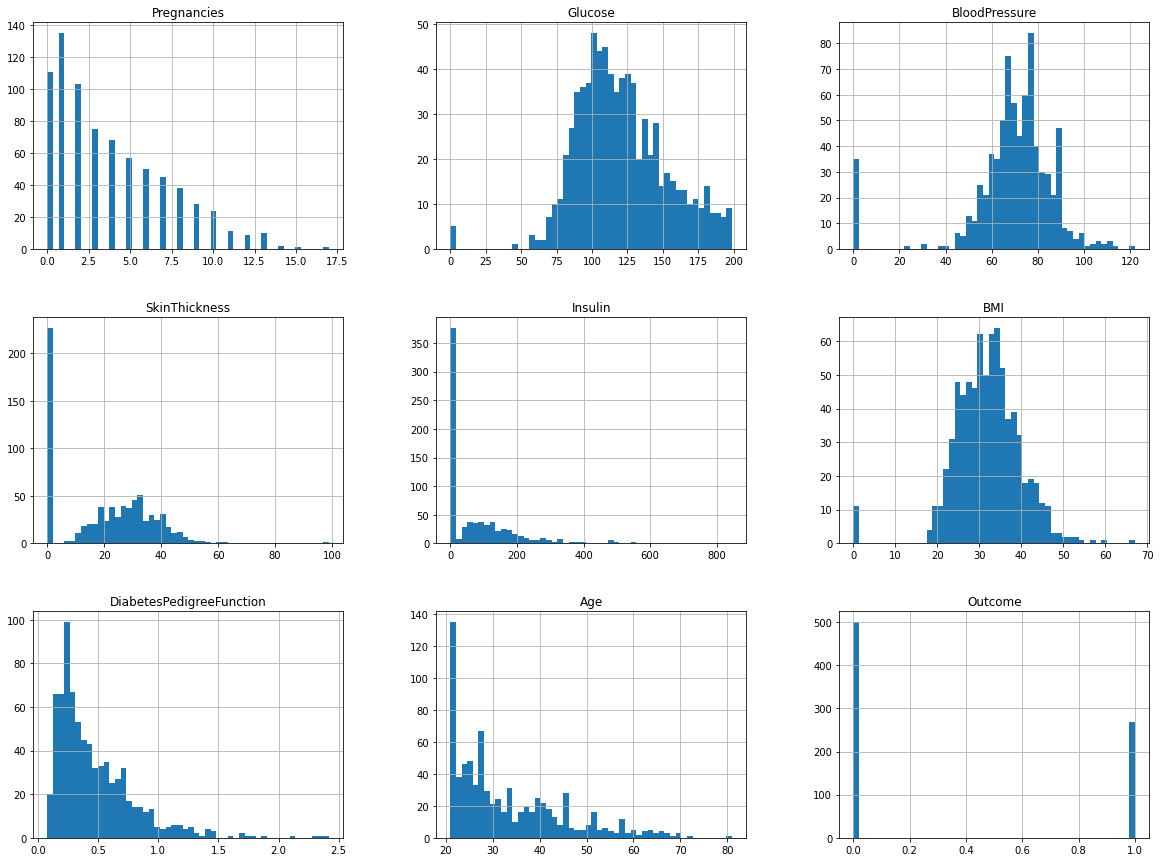

In [8]:
# Histogram
diabetes_df.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
#printing
print("How many null values in the dataset?:",diabetes_df.isnull().any().sum())

How many null values in the dataset?: 0


In [10]:
#Just take the values, ignoring the labels and index
diabetes_df = diabetes_df.values
diabetes_df


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
X= diabetes_df[:,0:8] #Predictors
y = diabetes_df[:,8] #Target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25)

logistic_model = LogisticRegression(fit_intercept=True,C=1e15,solver='newton-cg',max_iter=300)
logistic_model.fit(X_train,y_train)
predicted = logistic_model.predict(X_test)
 
#Confusion matrix 

print("Confusion Matrix")
matrix = confusion_matrix(y_test,predicted)
print(matrix)

#Classification Report

print("\nClassification Report")
report = classification_report(y_test,predicted)
print(report)

#Accuracy

lr_accuracy = accuracy_score(y_test, predicted)
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

#Cross Validation

logreg = LogisticRegression(max_iter=500)
scores = cross_val_score(logreg , X_train , y_train , cv=20)
print(f"cross validation scores : {scores}")
print("Average cross validation scores :{:. 2f}",format(scores.mean()))

Confusion Matrix
[[109  11]
 [ 28  44]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       120
         1.0       0.80      0.61      0.69        72

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192

Logistic Regression Accuracy of Scikit Model: 79.69%
cross validation scores : [0.75862069 0.82758621 0.75862069 0.72413793 0.86206897 0.82758621
 0.72413793 0.79310345 0.72413793 0.68965517 0.93103448 0.72413793
 0.86206897 0.72413793 0.68965517 0.68965517 0.60714286 0.82142857
 0.78571429 0.78571429]
Average cross validation scores :{:. 2f} 0.7655172413793104


# DATA ANALYSIS

In [12]:
# Create Nutritional status column 

Nutritional_status = pd.Series([]) 


C:\Users\USER\AppData\Local\Temp/ipykernel_17976/3045346153.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [ ]:
# Nutritional status based on BMI

for i in range(len(diabetes_df)): 

  if diabetes_df['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
  elif diabetes_df['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
  elif diabetes_df['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
  elif diabetes_df['BMI'][i] >= 25 and diabetes_df['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
  elif diabetes_df['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
  else: 
        Nutritional_status[i]= diabetes_df['BMI'][i]

In [ ]:
# Insert new column - Nutritional Status
diabetes_df.insert(6, "Nutritional Status", Nutritional_status)


In [ ]:
# Check df containing new column
diabetes_df.head (5)

In [ ]:
diabetes_df['Nutritional Status'].value_counts()

* Obese          472  
* Overweight     179  
* Normal         102
* NA              11
* Underweight      4 
* Name: Nutritional Status, dtype: int64
* 11 women don't have information about BMI. Only 106 of 758 women have normal  weight. Most of the women present overweight or obesity.



**Diabetic level**

In [ ]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 
Glucose_level = pd.Series([]) 

In [ ]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(diabetes_df)): 
    if diabetes_df['Glucose'][i] == 0.0: 
        Glucose_level [i]="NA"
    
    elif diabetes_df['Glucose'][i] <= 140: 
        Glucose_level [i]="Normal"
    
    elif diabetes_df['Glucose'][i] > 140 & diabetes_df['Glucose'][i] <= 198: 
        Glucose_level [i]="Impaired Glucose Tolerance"
        
    elif diabetes_df['Glucose'][i] > 198: 
        Glucose_level[i]="Diabetic Level"
        
    else: 
        Glucose_level[i]= diabetes_df['Glucose'][i] 

In [ ]:
# Insert new column - Glucose Result
diabetes_df.insert(2, "Glucose Result", Glucose_level)

In [ ]:
diabetes_df['Glucose Result'].value_counts()

**Reference on the Level of diabetes :-**
* Normal                        571
* Impaired Glucose Tolerance    192
* NA                              5
*  Name: Glucose Result, dtype: int64


In [ ]:
Impaired_Glucose_Tolerance_Diabetic = ((diabetes_df ['Glucose'] > 140 ) & (diabetes_df ['Glucose'] <= 198) & (diabetes_df ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.

In [ ]:
Normal_Glucose_Diabetic = ((diabetes_df['Glucose'] != 0 ) & (diabetes_df['Glucose'] <= 140) & (diabetes_df['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

In the given dataset 134 Women recorded non diabetic .

In [ ]:
diabetes_df.head(5)

**AGE**

In [ ]:
diabetes_df['Age'].value_counts()

Most of the Womans participated in the creation of data set are of 22 yrs ( 72 )and the least to be 72 , 64 , 68 , 70 and 81 .

# Reference 
* Taken reference from - https://colab.research.google.com/drive/1duJLwYRbHXB5p1NHoGYdzC_5pp6AFGJK?usp=sharing

* Kaggle

* https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

* In this project, Pima Indians Diabetes Database has been used.

* url: https://www.kaggle.com/uciml/pima-indians-diabetes-database
